In [1]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 59.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 65.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316960 sha256=08cec3175f8a4e6c9242b8837726ea0c2a250b9732133ad35ef57fd981656ead
  Stored in directory: /root/.cache/pip/wheels/fc/76/11/5b953090eebf531f660948a30cd26e70260619f6480f186a5a
  Created wheel for keras_bert: filename=

Import the Libraries

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

Load the data

In [ ]:
df = pd.read_csv("/content/SMSSpamCollection", sep="\t", names=['label', 'text'])

In [5]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Cross validate

In [6]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.2, random_state=0)

In [7]:
data_train.shape

(4457, 2)

In [8]:
data_test.shape

(1115, 2)

In [9]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(
    train_df=data_train,
    text_column='text',
    label_columns='label',
    val_df=data_test,
    preprocess_mode='bert') # or distilbert

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [10]:
X_train

[array([[  101,  2053,  1045, ...,     0,     0,     0],
        [  101,  2065,  2017, ...,     0,     0,     0],
        [  101,  2031,  2017, ...,     0,     0,     0],
        ...,
        [  101,  2005, 24471, ...,     0,     0,     0],
        [  101,  1054,  1057, ...,     0,     0,     0],
        [  101,  3461,  3110, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [11]:
preproc

Build the classifer

In [12]:
# use 'distilbert' if you want
model = text.text_classifier(name='bert',
                             train_data=(X_train, y_train),
                             preproc=preproc)

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [13]:
type(model) # Functional

keras.src.engine.functional.Functional

In [14]:
# here we have taken batch size as 6 as from the documentation it is
# recommend to use this with maxlen as 500
learner = ktrain.get_learner(model=model,
                            train_data=(X_train, y_train),
                            val_data=(X_test, y_test),
                            batch_size=6)

In [15]:
learner

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
743/743 [==============================] - 464s 589ms/step - loss: 0.2454 - accuracy: 0.9251
Epoch 2/2
743/743 [==============================] - 139s 186ms/step - loss: 1.2038 - accuracy: 0.7931


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(




done.
Visually inspect loss plot and select learning rate associated with falling loss


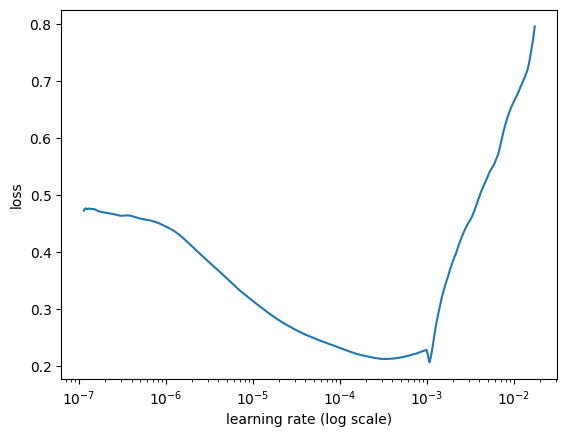

In [16]:
learner.lr_find(show_plot=True, max_epochs=2)

In [18]:
learner.fit_onecycle(lr=10e-3, epochs=1)
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('/content/drive/MyDrive/BERTspam_classifier')



begin training using onecycle policy with max lr of 0.01...
743/743 [==============================] - 480s 646ms/step - loss: 0.7446 - accuracy: 0.8100 - val_loss: 0.4153 - val_accuracy: 0.8565


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
